In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


In [6]:
import numpy as np
from src.depth import DepthPoset

import matplotlib.pyplot as plt
import networkx as nx

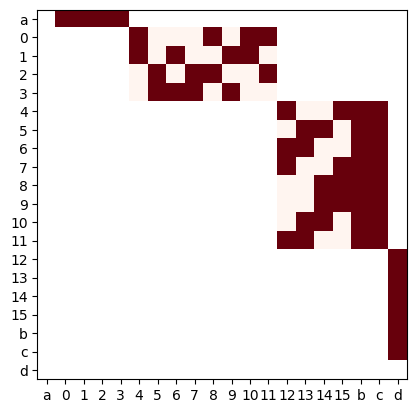

In [96]:
order = np.concatenate([['a'], np.arange(16).astype(str), ['b', 'c', 'd']])

dims = np.zeros(len(order), dtype=int)
dims[0] = -1
dims[-3:] = [2, 2, 3]
dims[1:-3] = np.vectorize(lambda i: 0 if i < 4 else (1 if i < 12 else 2))(order[1:-3].astype(int))

matrix = np.zeros([20, 20], dtype=int)
matrix[0, np.arange(1, 5)] = 1

for i, j in [(1, 5), (2, 5), (3, 6), (4, 6), 
             (2, 7), (4, 7), (3, 8), (4, 8), 
             (1, 9), (3, 9), (2, 10), (4, 10), 
             (1, 11), (2, 11), (1, 12), (3, 12)]:
    matrix[i, j] = 1
for i, j in [(5, 13), (5, 16), (6, 14), (6, 15), 
             (7, 13), (7, 14), (8, 13), (8, 16), 
             (9, 15), (9, 16), (10, 15), (10, 16), 
             (11, 14), (11, 15), (12, 13), (12, 14)]:
    matrix[i, j] = 1
matrix[np.arange(5, 13), 17] = 1
matrix[np.arange(5, 13), 18] = 1
matrix[np.arange(13, 19), 19] = 1



matrix_show = matrix.copy().astype(float)
matrix_show[dims.reshape(1, 20) - dims.reshape(20, 1) != 1] = np.nan

plt.imshow(matrix_show, cmap='Reds')

plt.xticks(np.arange(len(order)), order)
plt.yticks(np.arange(len(order)), order)
plt.show()

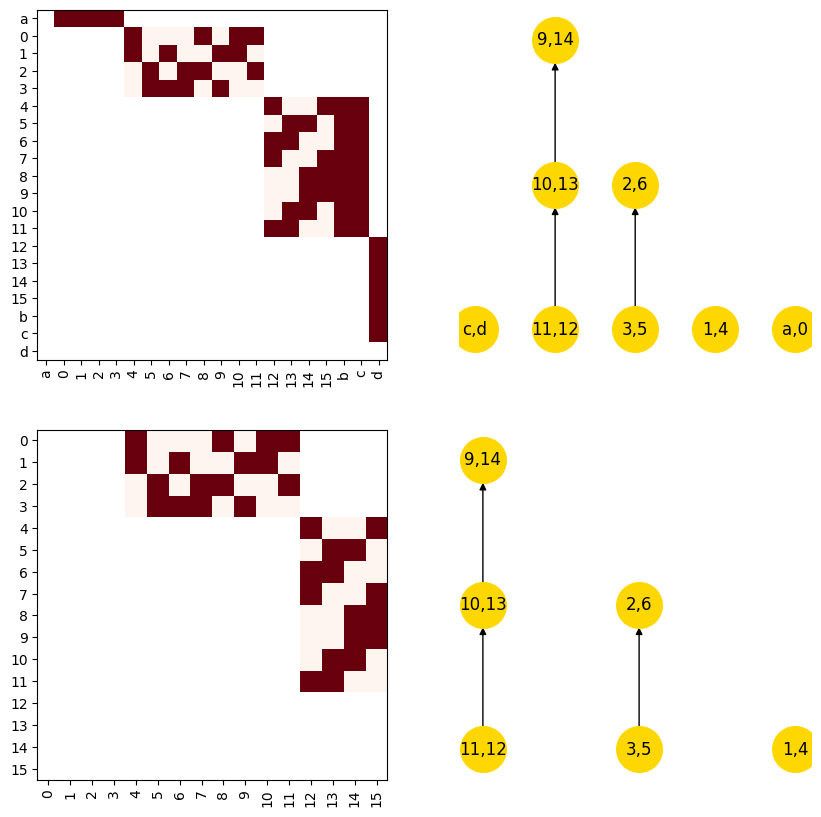

In [103]:
dp0 = DepthPoset.from_border_matrix(border_matrix=matrix, dims=dims, sources=order)
dp1 = DepthPoset.from_border_matrix(border_matrix=matrix[1:-3, 1:-3], dims=dims[1:-3], sources=order[1:-3])

fig, axs = plt.subplots(2, 2, figsize=(10, 10))


axs[0, 0].imshow(matrix_show, cmap='Reds')
axs[0, 0].set_xticks(np.arange(len(order)), order, rotation=90)
axs[0, 0].set_yticks(np.arange(len(order)), order, rotation=0)

axs[1, 0].imshow(matrix_show[1:-3, 1:-3], cmap='Reds')
axs[1, 0].set_xticks(np.arange(len(order) - 4), order[1:-3], rotation=90)
axs[1, 0].set_yticks(np.arange(len(order) - 4), order[1:-3], rotation=0)

for i, dp in enumerate([dp0, dp1]):
    nx.draw_networkx(dp.get_transitive_reduction(), pos=dp.hasse_layout(), ax=axs[i, 1], node_color='gold', node_size=1080)
    axs[i, 1].axis('off') 

plt.show()